In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import scipy.stats as st
from IPython.display import display
pd.options.display.max_columns = None

# Cleaning

In [2]:
# Load DataFrame for 2023 listings
listings_big_df23 = pd.read_csv("../Tourism_Project/Data/airbnb_listings_oct_1_2023.csv.gz")
l_df23 = listings_big_df23.copy()

In [3]:
l_df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38792 non-null  int64  
 1   listing_url                                   38792 non-null  object 
 2   scrape_id                                     38792 non-null  int64  
 3   last_scraped                                  38792 non-null  object 
 4   source                                        38792 non-null  object 
 5   name                                          38792 non-null  object 
 6   description                                   38223 non-null  object 
 7   neighborhood_overview                         22556 non-null  object 
 8   picture_url                                   38792 non-null  object 
 9   host_id                                       38792 non-null 

In [4]:
l_df23.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
# Drop null columns
l_df23.drop(labels= ["bathrooms","calendar_updated"], axis=1, inplace=True)
len(l_df23.columns)

73

In [6]:
l_df23.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9630344,https://www.airbnb.com/rooms/9630344,20231001204715,2023-10-02,city scrape,Rental unit in Brooklyn · ★4.80 · 1 bedroom ·...,Enjoy your own private bedroom in our 2 bedroo...,Easy access to subway. Trendy and yet quiet.,https://a0.muscache.com/pictures/496cf3f1-7d0d...,47783628,https://www.airbnb.com/users/show/47783628,Tiffannie,2015-10-30,"New York, NY",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/5c087...,https://a0.muscache.com/im/pictures/user/5c087...,NaN,1.0,2.0,"['email', 'phone']",t,f,"Brooklyn , New York, United States",Bushwick,Brooklyn,40.68457,-73.91181,Private room in rental unit,Private room,1,1 shared bath,NaN,1.0,"[""Body soap"", ""Dryer"", ""Refrigerator"", ""Wifi"",...",$65.00,30,30,30,30,30,30,30.0,30.0,t,29,59,89,364,2023-10-02,5,0,0,2016-08-14,2018-04-30,4.8,4.6,5.0,5.0,5.0,4.8,5.0,NaN,f,1,0,1,0,0.06


In [7]:
# Include only the columns we want
l_df23 = l_df23[['id',"host_id","host_listings_count","neighbourhood_cleansed", \
            "neighbourhood_group_cleansed","latitude","longitude","property_type",'price',\
            "room_type","accommodates","amenities","minimum_nights","minimum_minimum_nights", \
            "review_scores_rating", "review_scores_location","license","reviews_per_month"]]

l_df23.head(1)

,id,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,room_type,accommodates,amenities,minimum_nights,minimum_minimum_nights,review_scores_rating,review_scores_location,license,reviews_per_month
0,9630344,47783628,1.0,Bushwick,Brooklyn,40.68457,-73.91181,Private room in rental unit,$65.00,Private room,1,"[""Body soap"", ""Dryer"", ""Refrigerator"", ""Wifi"",...",30,30,4.8,4.8,NaN,0.06


In [8]:
l_df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_id                       38792 non-null  int64  
 2   host_listings_count           38787 non-null  float64
 3   neighbourhood_cleansed        38792 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   property_type                 38792 non-null  object 
 8   price                         38792 non-null  object 
 9   room_type                     38792 non-null  object 
 10  accommodates                  38792 non-null  int64  
 11  amenities                     38792 non-null  object 
 12  minimum_nights                38792 non-null  int64  
 13  m

In [9]:
# export file
filepath = Path('../Tourism_Project/Data/listings_oct_2023_clean.csv')  
l_df23.to_csv(filepath)

In [10]:
# import file for listings 2022
listings_big_df22 = pd.read_csv("../Tourism_Project/Data/airbnb_listings_oct_4_2022.csv.gz", low_memory=False)

In [11]:
l_df22 = listings_big_df22.copy()

In [12]:
# Drop null columns
l_df22.drop(labels= ["bathrooms","calendar_updated"], axis=1, inplace=True)
len(l_df22.columns)

73

In [13]:
# Include only the columns we want
l_df22 = l_df22[['id',"host_id","host_listings_count","neighbourhood_cleansed", \
            "neighbourhood_group_cleansed","latitude","longitude","property_type",'price',\
            "room_type","accommodates","amenities","minimum_nights","minimum_minimum_nights", \
            "review_scores_rating", "review_scores_location","license","reviews_per_month"]]

l_df22.head(1)

,id,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,room_type,accommodates,amenities,minimum_nights,minimum_minimum_nights,review_scores_rating,review_scores_location,license,reviews_per_month
0,2539,2787,9.0,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,$213.00,Private room,2,"[""Essentials"", ""Wifi"", ""Heating"", ""Hangers"", ""...",30,30.0,4.89,4.75,NaN,0.11


In [14]:
l_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            40545 non-null  int64  
 1   host_id                       40545 non-null  int64  
 2   host_listings_count           40522 non-null  float64
 3   neighbourhood_cleansed        40545 non-null  object 
 4   neighbourhood_group_cleansed  40545 non-null  object 
 5   latitude                      40545 non-null  float64
 6   longitude                     40545 non-null  float64
 7   property_type                 40545 non-null  object 
 8   price                         40545 non-null  object 
 9   room_type                     40545 non-null  object 
 10  accommodates                  40545 non-null  int64  
 11  amenities                     40545 non-null  object 
 12  minimum_nights                40545 non-null  int64  
 13  m

In [15]:
# export file
filepath = Path('../Tourism_Project/Data/listings_oct_2022_clean.csv')  
l_df22.to_csv(filepath)

# Analysis

In [16]:
l_df23.columns

Index(['id', 'host_id', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'price', 'room_type', 'accommodates', 'amenities',
       'minimum_nights', 'minimum_minimum_nights', 'review_scores_rating',
       'review_scores_location', 'license', 'reviews_per_month'],
      dtype='object')

In [17]:
# Build Dataframe to analyze minimum night listings
# Create bins
bins = ["1-29","30","30+"]
dfs = [l_df22, l_df23]
year = ["Before Ban - 2022", "After Ban - 2023"]
min_nights_df = pd.DataFrame()

min_nights_df["Minimum Nights"] = bins 
min_nights_df["Before Ban - 2022"] = ""
min_nights_df["After Ban - 2023"] = ""
        
for i in range(len(dfs)):
    #min_nights_df[year[i]][0] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]==0].count()
    min_nights_df[year[i]][0] = dfs[i]["minimum_nights"][(dfs[i]["minimum_nights"]>=1) & (dfs[i]["minimum_nights"]<30)].count()
    min_nights_df[year[i]][1] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]==30].count()
    min_nights_df[year[i]][2] = dfs[i]["minimum_nights"][dfs[i]["minimum_nights"]>30].count()

# Display Table
min_nights_df.head()

,Minimum Nights,Before Ban - 2022,After Ban - 2023
0,1-29,21314,3227
1,30,17256,33273
2,30+,1975,2292


In [18]:
# Format Column Datatypes
min_nights_df = min_nights_df.astype({"Before Ban - 2022": int, "After Ban - 2023": int})

min_nights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Minimum Nights     3 non-null      object
 1   Before Ban - 2022  3 non-null      int32 
 2   After Ban - 2023   3 non-null      int32 
dtypes: int32(2), object(1)
memory usage: 176.0+ bytes


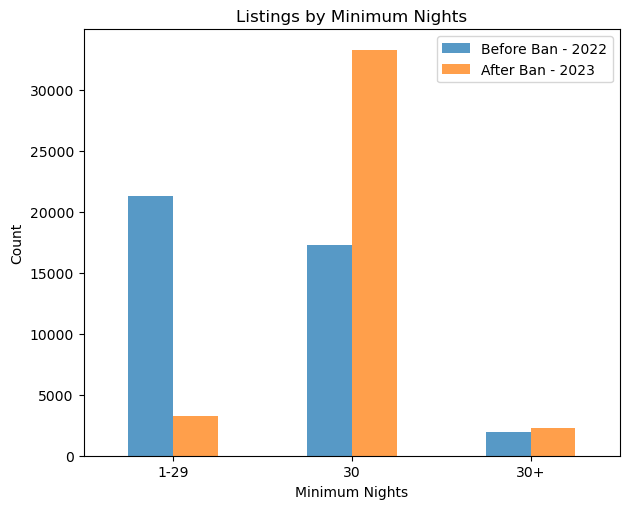

In [19]:
# Vertical Bar Chart
min_nights_df.plot(x="Minimum Nights", y=["Before Ban - 2022","After Ban - 2023"], kind="bar", title="Listings by Minimum Nights", alpha=.75,
                  color=['tab:blue','tab:orange'], figsize=(6.4,5.2))
plt.ylabel("Count")
plt.xticks(rotation="horizontal")

plt.tight_layout()

plt.savefig("..\Tourism_Project\Charts\min_night_listings.png")

plt.show()

In [21]:
# Create dataframes for boxplots
x1 = l_df22["minimum_nights"][l_df22["minimum_nights"]<=100]
x2 = l_df23["minimum_nights"][l_df23["minimum_nights"]<=100]

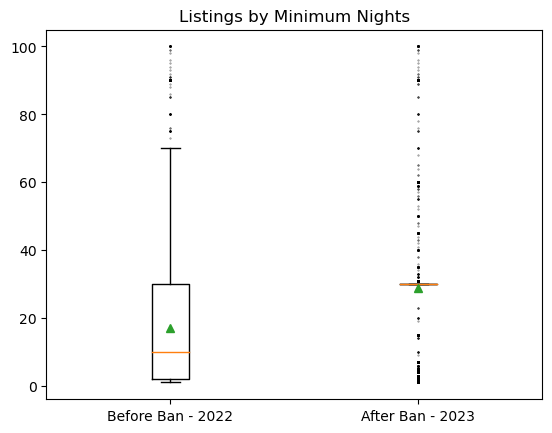

In [22]:
# Boxplots of minimum nights
ax = plt.boxplot([x1, x2], showmeans=True)
plt.xticks(ticks=[1, 2], labels= ["Before Ban - 2022", "After Ban - 2023"])
plt.title("Listings by Minimum Nights")
plt.setp(ax['fliers'], markersize=.5, alpha=.5)

plt.show()

In [23]:
# Group the neighbourhoods and find the average review rating for short term rentals
ratings_short_term_df22 = l_df22[["neighbourhood_cleansed","review_scores_rating"]][l_df22["minimum_nights"]<30]
ratings_short_term_df23 = l_df23[["neighbourhood_cleansed","review_scores_rating"]][l_df23["minimum_nights"]<30]

rst_df22 = ratings_short_term_df22
rst_df23 = ratings_short_term_df23

# Find average and group by neighborhood group
rst_avg_df22 = rst_df22.groupby("neighbourhood_cleansed").mean()
rst_avg_df23 = rst_df23.groupby("neighbourhood_cleansed").mean()

# Rename the columns
rst_avg_df22.columns = ["2022"]
rst_avg_df23.columns = ["2023"]

# Merge dataframes
rst_avg_df_n = rst_avg_df22
# Add 2023 column
rst_avg_df_n["2023"] = rst_avg_df23

display(rst_avg_df_n.describe())

,2022,2023
count,238.000000,117.000000
mean,4.722653,4.776380
std,0.144242,0.194615
min,3.660000,3.791667
25%,4.667179,4.699286
50%,4.737083,4.820500
75%,4.810750,4.915000
max,5.000000,5.000000


There are 121 neighborhoods that no longer have any short term airbnb listings!!!


C:\Users\minh_\AppData\Local\Temp\ipykernel_34916\2144385037.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


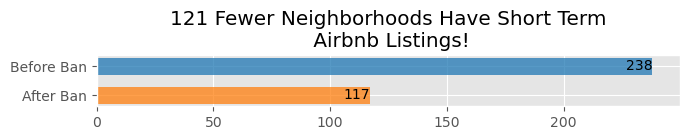

In [24]:
# Plot neighborhood count pre/post ban for short term rentals
st_listing_count_22 = rst_avg_df_n["2022"].count()
st_listing_count_23 = rst_avg_df_n["2023"].count()
short_term_listing_count = [st_listing_count_23, st_listing_count_22]
x = ["After Ban", "Before Ban"]

print("There are 121 neighborhoods that no longer have any short term airbnb listings!!!")
plt.style.use('ggplot')
plt.figure(figsize=[7,1.5], layout='constrained', edgecolor='r')
plt.barh(x, short_term_listing_count, height=.6, align="center", color=['tab:orange','tab:blue'], 
         alpha=.75, )
plt.title("121 Fewer Neighborhoods Have Short Term\n Airbnb Listings!")
# plt.xlabel("Count")

for index, value in enumerate(short_term_listing_count):
    plt.text(value, index,
             str(value), horizontalalignment='right', verticalalignment='center')

plt.tight_layout()
    
plt.savefig("../Tourism_Project/Charts/neighborhoods_st_listings.png")    
    
plt.show()


In [25]:
# Licenses
licenses_22 = l_df22[["license"]][l_df22["minimum_nights"]<30].count()
licenses_23 = l_df23[["license"]][l_df23["minimum_nights"]<30].count()
total_short_term_listings_23 = l_df23["license"].count()

display(licenses_22)
display(licenses_23)

license    4
dtype: int64

license    2785
dtype: int64

In [26]:
licenses_22[0]

4

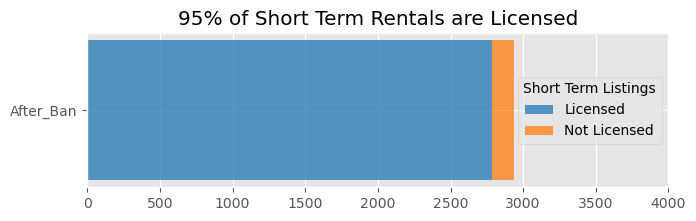

In [27]:
plt.rcParams["figure.figsize"] = [7.5, 2]
# plt.rcParams["figure.autolayout"] = True

ban = ["After_Ban"]
licenses_issued = [licenses_23[0]]
total_short_term = [total_short_term_listings_23-licenses_23[0]]

b1 = plt.barh(ban, licenses_issued, color="tab:blue", alpha=.75)

b2 = plt.barh(ban, total_short_term, left=licenses_issued, color="tab:orange", alpha=.75)

plt.legend([b1, b2], ["Licensed", "Not Licensed"], title="Short Term Listings", loc="center right")

plt.xlim((0, 4000))
plt.title("95% of Short Term Rentals are Licensed")

plt.savefig("../Tourism_Project/Charts/ban_compliance.png")

plt.show()

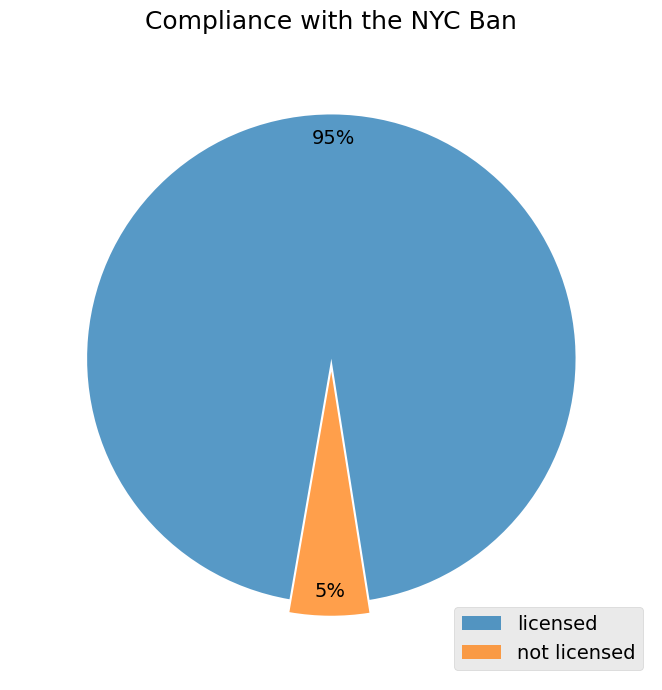

In [28]:
# Pie chart for Licenses
exempt = licenses_23[0]
non_exempt = total_short_term_listings_23 - licenses_23[0]
licenses_df = pd.DataFrame({"compliance": ["licensed", "not licensed"], "Compliance": [exempt, non_exempt]})
licenses_df = licenses_df.set_index("compliance")


# licenses_df
explode = [0, 0.05]

plt.style.use('ggplot')
ax=licenses_df.plot(kind='pie', y="Compliance", sharey=False, startangle=279, radius=.95, explode=explode, autopct = '%1.f%%', figsize=(7,7),
                          legend=True, fontsize=14, ylabel="", labeldistance=None, pctdistance=.9, colors=("tab:blue","tab:orange"), wedgeprops={'alpha':0.75})
# ax.set_facecolor('lightgrey')
ax.legend(loc="lower right", fontsize=14)
ax.set_title("Compliance with the NYC Ban", fontsize=18)

plt.tight_layout()

plt.savefig("../Tourism_Project/Charts/ban_compliance2.png")

plt.show()

<font size="8">Borough Listings in 2022 and 2023</font>

In [29]:
# Load cleaned listings csv's for Oct 2022 and 2023
l_df23 = pd.read_csv("..\Tourism_Project\Data\listings_oct_2023_clean.csv")
l_df22 = pd.read_csv("..\Tourism_Project\Data\listings_oct_2022_clean.csv")

In [30]:
# Assess the neccessary columns
l_df23.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'price', 'room_type', 'accommodates',
       'amenities', 'minimum_nights', 'minimum_minimum_nights',
       'review_scores_rating', 'review_scores_location', 'license',
       'reviews_per_month'],
      dtype='object')

In [31]:
# Evaluate the number of columns and Dtypes
l_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40545 entries, 0 to 40544
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40545 non-null  int64  
 1   id                            40545 non-null  int64  
 2   host_id                       40545 non-null  int64  
 3   host_listings_count           40522 non-null  float64
 4   neighbourhood_cleansed        40545 non-null  object 
 5   neighbourhood_group_cleansed  40545 non-null  object 
 6   latitude                      40545 non-null  float64
 7   longitude                     40545 non-null  float64
 8   property_type                 40545 non-null  object 
 9   price                         40545 non-null  object 
 10  room_type                     40545 non-null  object 
 11  accommodates                  40545 non-null  int64  
 12  amenities                     40545 non-null  object 
 13  m

In [32]:
#rearrange columns of df22 & df23 to have neighbourhood_group_cleansed as first column
rearrange_columns_22 = l_df22[["neighbourhood_group_cleansed","neighbourhood_cleansed","host_listings_count","latitude","longitude","minimum_nights","price","review_scores_rating","review_scores_location"]]
rearrange_columns_23 = l_df23[["neighbourhood_group_cleansed","neighbourhood_cleansed","host_listings_count","latitude","longitude","minimum_nights","price","review_scores_rating","review_scores_location"]]

#Dropping NaN in the 2022 & 2023 data
rearrange_columns_22_dropna = rearrange_columns_22.dropna()
rearrange_columns_23_dropna = rearrange_columns_23.dropna()


In [33]:
#Converting the price column from 2022 & 2023 data object to float
rearrange_columns_22_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)
rearrange_columns_23_dropna["price"] = rearrange_columns_23_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)

C:\Users\minh_\AppData\Local\Temp\ipykernel_34916\4056571151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_22_dropna["price"] = rearrange_columns_22_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)
C:\Users\minh_\AppData\Local\Temp\ipykernel_34916\4056571151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rearrange_columns_23_dropna["price"] = rearrange_columns_23_dropna["price"].replace("[^0-9\.]","", regex=True).astype(float)


<font size="5">Number of Listings per Boroughs 2022 vs 2023</font>

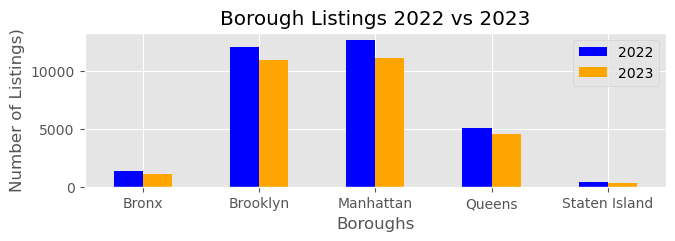

In [48]:
#Group data to the borough columns and take the count per borough
listing_count_22 = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()
listing_count_23 = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["neighbourhood_group_cleansed"].count()

#Create a dataframe with 2022 and 2023 listing count
listing_count_vs = pd.DataFrame({
                              "2022": listing_count_22,
                              "2023": listing_count_23,
                             })

#Plot a bar graph that show the relationship between 2022 and 2023 number of listings
listing_count_vs.plot(kind="bar", title="Borough Listings 2022 vs 2023",color=("blue","orange"))
plt.xticks(rotation="horizontal")
plt.ylabel("Number of Listings)")
plt.xlabel("Boroughs")
plt.savefig("..\Tourism_Project\Charts\Borough Listings 2022 vs 2023")

plt.show()

<font size="5">Listing Price per Boroughs 2022 vs 2023</font>

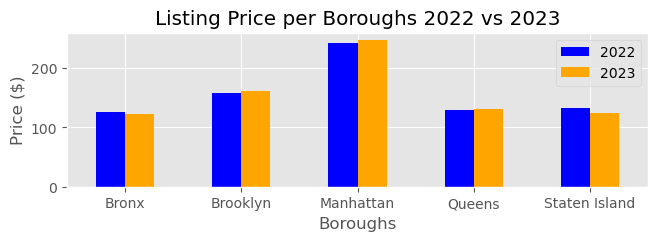

In [47]:
#Group data to the borough columns and take the average of the price
hood_group_22_price = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["price"].mean().round(2)
hood_group_23_price = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["price"].mean().round(2)

#Create a dataframe with 2022 and 2023 ratings
borough_price = pd.DataFrame({
                              "2022": hood_group_22_price,
                              "2023": hood_group_23_price,
                             })

#Plot a bar graph that show the relationship between 2022 and 2023 price
borough_price.plot(kind="bar", title="Listing Price per Boroughs 2022 vs 2023",color=("blue","orange"))
plt.xticks(rotation="horizontal")
plt.ylabel("Price ($)")
plt.xlabel("Boroughs")
plt.savefig("..\Tourism_Project\Charts\Listing Price per Boroughs 2022 vs 2023")

plt.show()

<font size="5">Borough Ratings 2022 vs 2023</font>

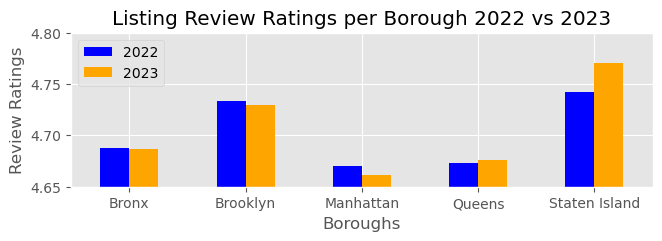

In [46]:
#Group data to the borough columns and take the average of the review scores
hood_group_22_rating = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()
hood_group_23_rating = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()

#Create a dataframe with 2022 and 2023 ratings
borough_rating = pd.DataFrame({
                              "2022": hood_group_22_rating,
                              "2023": hood_group_23_rating,
                             })

#Plot a bar graph that show the relationship between 2022 and 2023 ratings
borough_rating.plot(kind="bar", title="Listing Review Ratings per Borough 2022 vs 2023", ylim=(4.65,4.8),color=("blue","orange"))
plt.xticks(rotation="horizontal")
plt.ylabel("Review Ratings")
plt.xlabel("Boroughs")
plt.savefig("..\Tourism_Project\Charts\Listing Review Ratings per Borough 2022 vs 2023")

plt.show()

<font size="5">Borough Location Ratings 2022 vs 2023</font>

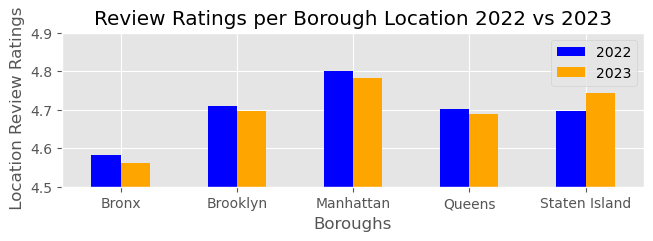

In [45]:
#Group data to the borough columns and take the average of the location review scores
hood_group_22_rating_location = rearrange_columns_22_dropna.groupby("neighbourhood_group_cleansed")["review_scores_location"].mean()
hood_group_23_rating_location = rearrange_columns_23_dropna.groupby("neighbourhood_group_cleansed")["review_scores_location"].mean()

#Create a dataframe with 2022 and 2023 ratings
borough_location_rating = pd.DataFrame({
                              "2022": hood_group_22_rating_location,
                              "2023": hood_group_23_rating_location,
                             })
borough_location_rating

#Plot a bar graph that show the relationship between 2022 and 2023 location ratings
borough_location_rating.plot(kind="bar", title="Review Ratings per Borough Location 2022 vs 2023", ylim=(4.5,4.9),color=("blue","orange"))
plt.xticks(rotation="horizontal")
plt.ylabel(" Location Review Ratings")
plt.xlabel("Boroughs")
plt.savefig("..\Tourism_Project\Charts\Review Ratings per Borough Location 2022 vs 2023")

plt.show()

<font size="5">Boroughs Price and Rating correlation</font>

The correlation between listing price and the review rating 0.02


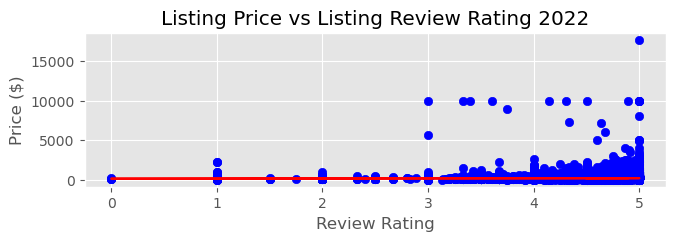

In [38]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_22 = st.pearsonr(rearrange_columns_22_dropna["review_scores_rating"],rearrange_columns_22_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_22[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_22_dropna["review_scores_rating"]
y_values = rearrange_columns_22_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Listing Review Rating 2022")
plt.savefig("..\Tourism_Project\Charts\Listing Price vs Listing Review Rating Correlation 2022")

plt.show()

The correlation between listing price and the review rating 0.02


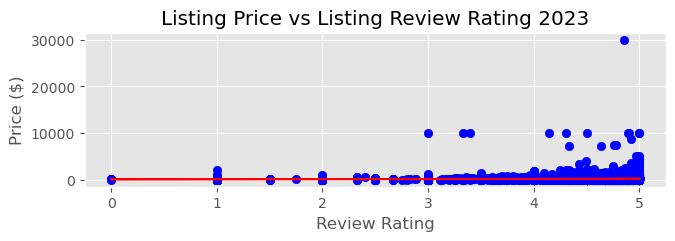

In [39]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_23 = st.pearsonr(rearrange_columns_23_dropna["review_scores_rating"],rearrange_columns_23_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_23[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_23_dropna["review_scores_rating"]
y_values = rearrange_columns_23_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Listing Review Rating 2023")
plt.savefig("..\Tourism_Project\Charts\Listing Price vs Listing Review Rating Correlation 2023")

plt.show()

The correlation between listing price and the review rating 0.05


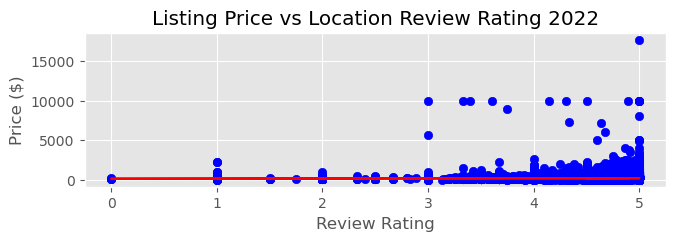

In [40]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_22_location = st.pearsonr(rearrange_columns_22_dropna["review_scores_location"],rearrange_columns_22_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_22_location[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_22_dropna["review_scores_rating"]
y_values = rearrange_columns_22_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Location Review Rating 2022")
plt.savefig("..\Tourism_Project\Charts\Listing Price vs Borough Location Review Rating 2022")

plt.show()

The correlation between listing price and the review rating 0.06


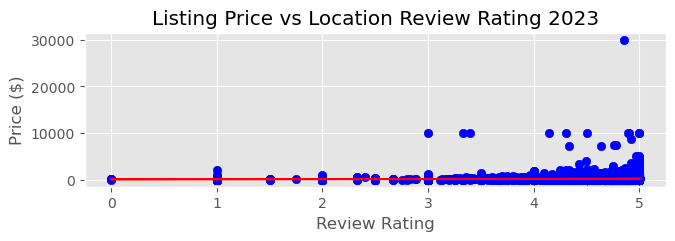

In [41]:
# Calculate the correlation coefficient and a linear regression model 
boroughs_correlation_coefficient_23_location = st.pearsonr(rearrange_columns_23_dropna["review_scores_location"],rearrange_columns_23_dropna["price"])
print(f"The correlation between listing price and the review rating {round(boroughs_correlation_coefficient_23_location[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
x_values = rearrange_columns_23_dropna["review_scores_rating"]
y_values = rearrange_columns_23_dropna["price"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Review Rating")
plt.ylabel("Price ($)")
plt.title("Listing Price vs Location Review Rating 2023")
plt.savefig("..\Tourism_Project\Charts\Listing Price vs Borough Location Review Rating 2023")
plt.show()

<font size="5">Number of Short-Term Listings (<30 days) per Boroughs</font>

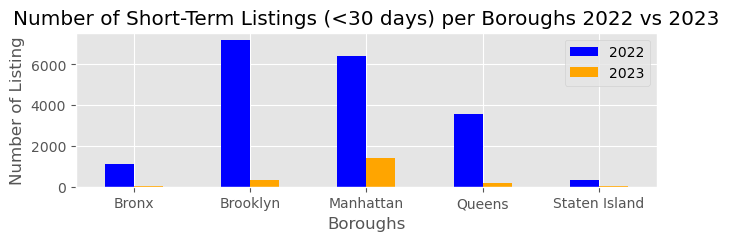

In [44]:
mini_night_1to29_2022 = rearrange_columns_22_dropna[rearrange_columns_22_dropna["minimum_nights"]<30]
mini_night_1to29_2022 = mini_night_1to29_2022.groupby("neighbourhood_group_cleansed")["minimum_nights"].count()
mini_night_1to29_2023 = rearrange_columns_23_dropna[rearrange_columns_23_dropna["minimum_nights"]<30]
mini_night_1to29_2023 = mini_night_1to29_2023.groupby("neighbourhood_group_cleansed")["minimum_nights"].count()

borough_mini_nights = pd.DataFrame({
                              "2022": mini_night_1to29_2022,
                              "2023": mini_night_1to29_2023,
                             })


borough_mini_nights.plot(kind="bar", title="Short-Term Listings (<30 days) per Boroughs 2022 vs 2023",color=("blue","orange"))
plt.xticks(rotation="horizontal")
plt.ylabel("Number of Listing")
plt.xlabel("Boroughs")
plt.title("Number of Short-Term Listings (<30 days) per Boroughs 2022 vs 2023")
plt.savefig("../Tourism_Project/Charts/Number of Short Term Listings per Bourough 2022 vs 2023")


plt.show()